<a href="https://colab.research.google.com/github/josh5139/Digital-online-national-Election-system/blob/main/heart_disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check if ZIP file is uploaded

In [72]:
!ls


ask-detrano	     hungarian.data		 processed.va.data
bak		     Index			 reprocessed.hungarian.data
cleveland.data	     long-beach-va.data		 sample_data
cleve.mod	     new.data			 switzerland.data
costs		     processed.cleveland.data	 WARNING
heart-disease.names  processed.hungarian.data
heart+disease.zip    processed.switzerland.data


Unzip the file

In [ ]:
!unzip heart+disease.zip


Archive:  heart+disease.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

See extracted files

In [ ]:
!ls


ask-detrano	     hungarian.data		 processed.va.data
bak		     Index			 reprocessed.hungarian.data
cleveland.data	     long-beach-va.data		 sample_data
cleve.mod	     new.data			 switzerland.data
costs		     processed.cleveland.data	 WARNING
heart-disease.names  processed.hungarian.data
heart+disease.zip    processed.switzerland.data


Load the dataset into Python

In [70]:
import pandas as pd

data = pd.read_csv("processed.cleveland.data", header=None)
data.columns = data.columns.astype(str) # Convert column names to strings
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


 shows the first 5 rows of your dataset

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


VISUALIZE DATASET OVERVIEW (TARGET DISTRIBUTION)

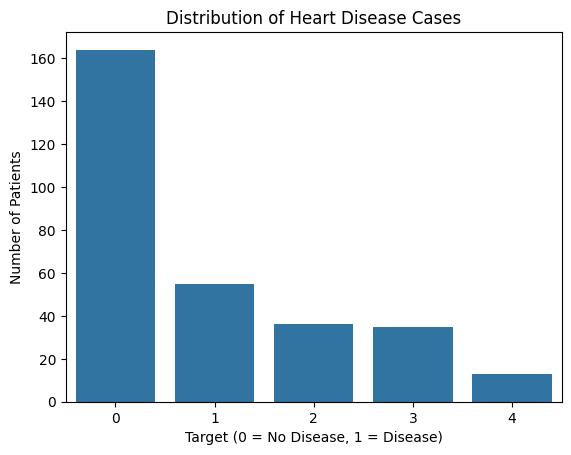

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x="13", data=data)
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

Check shape

In [ ]:
data.shape


(303, 14)

CORRELATION HEATMAP

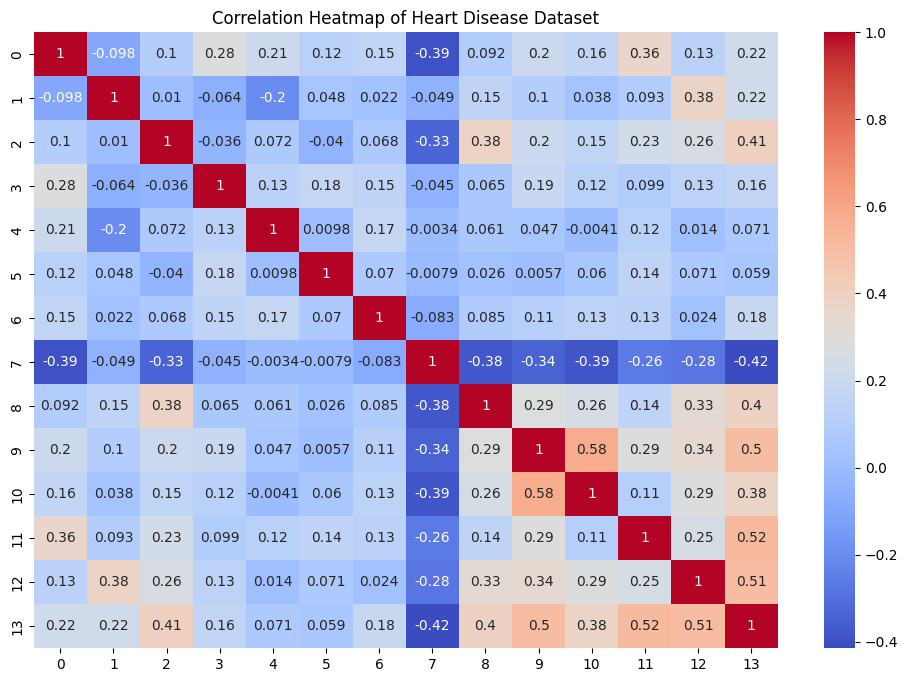

In [71]:
import numpy as np

# Create a copy to avoid modifying the original 'data' prematurely if needed elsewhere,
# or directly modify 'data' if this is the intended place for cleanup.
# For this context, it's safer to operate on a copy or ensure the original 'data' is clean globally.
# Let's clean the 'data' DataFrame directly since it's causing the issue here.

# Replace '?' with NaN in the 'data' DataFrame
data_cleaned = data.replace('?', np.nan)

# Convert all columns to numeric, coercing errors to NaN
for col in data_cleaned.columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Impute missing values with the mean (or other appropriate strategy)
# A simple imputer can be used here. For correlation, dropping NaN might also be an option
# or using pairwise deletion in corr() if supported, but imputation is generally better for heatmaps.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Fit and transform only numeric columns that might have NaNs introduced by 'coerce'
# Identify numeric columns for imputation
numeric_cols = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned[numeric_cols] = imputer.fit_transform(data_cleaned[numeric_cols])

plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

Check missing values

In [ ]:
data.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


DATA PREPROCESSING

---



Separate X and y

In [ ]:
X = data.drop(13, axis=1)
y = data[13]

Handle Missing Values

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Re-initialize X to be a DataFrame to ensure .replace() and .columns work
X = data.drop(13, axis=1)

# Replace '?' with NaN
X = X.replace('?', np.nan)

# Convert all columns to numeric type, coercing errors to NaN
# This handles any other non-numeric values that might be present
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

Feature Scaling (Normalization)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Ensure X is correctly preprocessed before scaling
# Re-initialize X from the original 'data' to ensure consistency if previous cells were not fully executed
X = data.drop(13, axis=1)

# Replace '?' with NaN
X = X.replace('?', np.nan)

# Convert all columns to numeric type, coercing errors to NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Impute missing values (mean strategy)
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Now apply StandardScaler to the cleaned and imputed numeric data
scaler = StandardScaler()
X = scaler.fit_transform(X)

Handle Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)


TRAIN DATA (80%)

In [ ]:
# Training set (used to teach the model)
X_train, y_train = X[:242], y[:242]


TEST DATA (20%)

In [ ]:
# Testing set (used to evaluate the model)
X_test, y_test = X[242:], y[242:]


**MACHINE LEARNING MODELS**

---



1️⃣ Logistic Regression (Baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

2️⃣ Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier()

3️⃣ Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)


SVC(probability=True)

4️⃣ Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(64,32))
ann.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32))

**MODEL EVALUATION**

---



In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.20      0.93      0.32        29
           1       0.55      0.56      0.56       121
           2       0.90      0.46      0.61       141
           3       0.68      0.78      0.73       134
           4       0.96      0.56      0.71       153

    accuracy                           0.61       578
   macro avg       0.66      0.66      0.59       578
weighted avg       0.76      0.61      0.64       578



CONFUSION MATRIX

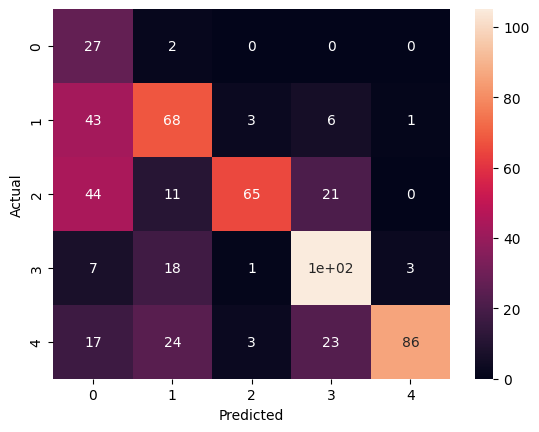

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC CURVE

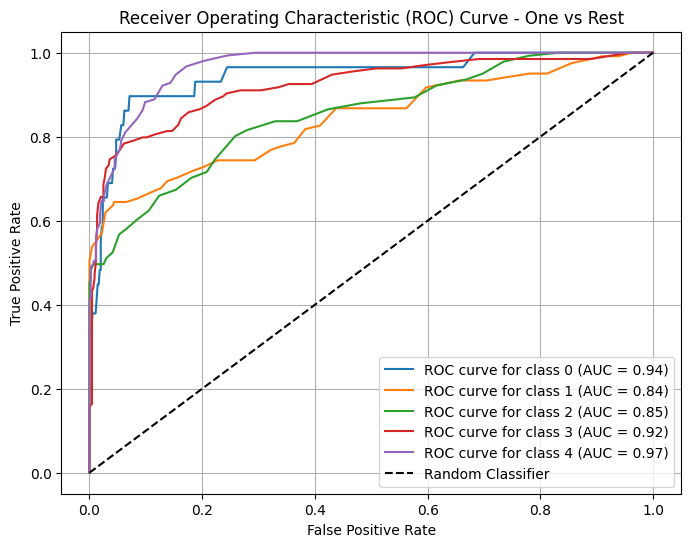

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_prob_all = rf.predict_proba(X_test) # Get probabilities for all classes
unique_classes = np.unique(y_test) # Get unique classes from y_test

plt.figure(figsize=(8, 6))

for i, class_label in enumerate(unique_classes):
    # Binarize y_test for the current class (one-vs-rest)
    y_test_binary = (y_test == class_label).astype(int)
    y_prob_class = y_prob_all[:, i]

    fpr, tpr, _ = roc_curve(y_test_binary, y_prob_class)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve for class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One vs Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

EXPLAINABLE AI (SHAP)

 99%|===================| 2860/2890 [00:41<00:00]       

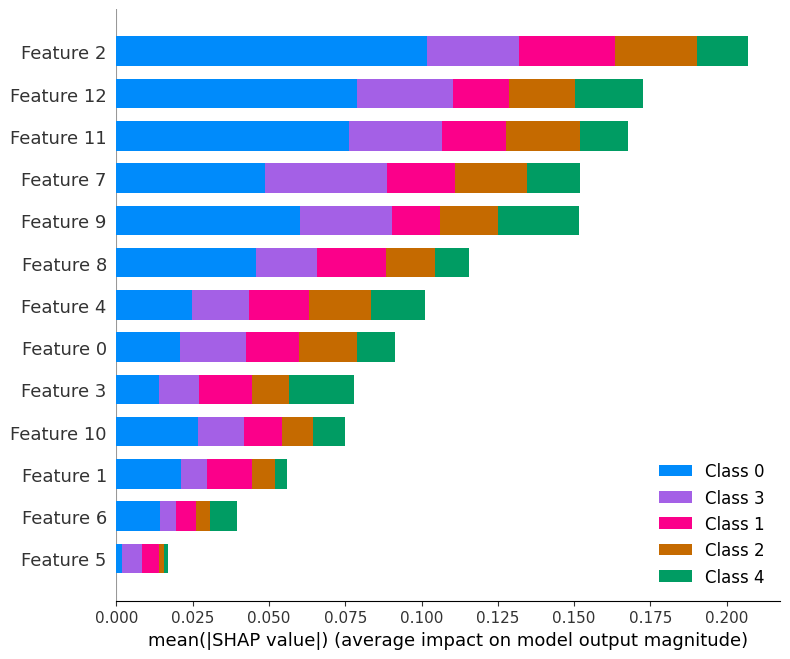

In [ ]:
import shap

explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test)